# YouTube Spam Comment Classification (Naive Bayes)
In this project, we aim to automatically identify and filter spam comments on YouTube using naive bayes.

## Import Relevant Libraries

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import glob
import seaborn as sns
sns.set()
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import naive_bayes
from sklearn import metrics
import itertools

## Load and Combine Datasets

In [5]:
# Get a list of all CSV files in the current directory
files = glob.glob("data\\*.csv")
files

['data\\Youtube01.csv',
 'data\\Youtube02.csv',
 'data\\Youtube03.csv',
 'data\\Youtube04.csv',
 'data\\Youtube05.csv']

In [6]:
data_list = []
for i in files:
    # Read each CSV file, drop irrelevant columns
    data_list.append(pd.read_csv(i).drop(["COMMENT_ID","AUTHOR","DATE"], axis = 1))

data_list[0]

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,"Hey, check out my new website!! This site is a...",1
...,...,...
344,How can this have 2 billion views when there's...,0
345,I don't now why I'm watching this in 2014﻿,0
346,subscribe to me for call of duty vids and give...,1
347,hi guys please my android photo editor downloa...,1


In [7]:
# Combine all data
data = pd.concat(data_list , axis = 0 , ignore_index = True)
data

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,"Hey, check out my new website!! This site is a...",1
...,...,...
1950,I love this song because we sing it at Camp al...,0
1951,I love this song for two reasons: 1.it is abou...,0
1952,wow,0
1953,Shakira u are so wiredo,0


## Data Inspection

In [9]:
data.isnull().sum()

CONTENT    0
CLASS      0
dtype: int64

In [10]:
# 1 -> spam
# 0 -> ham
data["CLASS"].value_counts()

CLASS
1    1004
0     951
Name: count, dtype: int64

## Prepare Features and Target

In [12]:
inputs = data["CONTENT"]
target = data["CLASS"]

## Split Data into Training and Testing Sets

In [14]:
x_train, x_test , y_train , y_test = model_selection.train_test_split(inputs , target , test_size = 0.2 , stratify = target , random_state = 42)

## Text Vectorization
This section converts the raw text content into numerical features. We use `CountVectorizer` to transform text into a matrix where each row represents a comment and each column represents a unique word, with values indicating the word in the comment.

In [16]:
vectorizer = CountVectorizer()
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

In [17]:
print(x_train_vec.shape)
print(x_train_vec.toarray())
print(vectorizer.get_feature_names_out())

(1564, 3905)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['00' '000' '02' ... 'ｔｈｉｓ' 'ｕｓｒ' 'ｗｗｗ']


In [18]:
x_test_vec.shape

(391, 3905)

## Model Training: Multinomial Naive Bayes

In [20]:
clf = naive_bayes.MultinomialNB(alpha = 1)
clf.fit(x_train_vec, y_train)

MultinomialNB(alpha=1)

In [21]:
# Make Predictions
y_test_hat = clf.predict(x_test_vec)

## Model Evaluation: Confusion Matrix

In [23]:
# confusion matrix function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


              precision    recall  f1-score   support

           0       0.95      0.85      0.90       190
           1       0.87      0.96      0.91       201

    accuracy                           0.91       391
   macro avg       0.91      0.90      0.90       391
weighted avg       0.91      0.91      0.90       391

Confusion matrix, without normalization
[[161  29]
 [  8 193]]


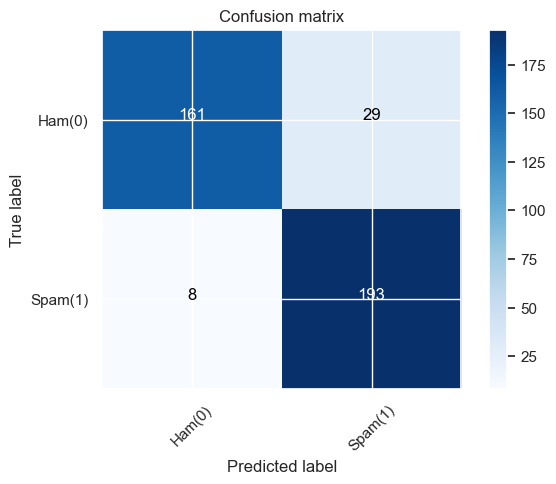

In [24]:
# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_test_hat, labels=[0,1])
np.set_printoptions(precision=2)

print (metrics.classification_report(y_test, y_test_hat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Ham(0)','Spam(1)'],normalize= False,  title='Confusion matrix')

In [25]:
print("Model Accuracy:", metrics.accuracy_score(y_test, y_test_hat))

Model Accuracy: 0.9053708439897699
